In [8]:
import os
import sys
base_dir = os.path.join(os.getcwd(), os.pardir, os.pardir)
sys.path.append(base_dir)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from Models.LatentFactorModels import OneNodeNonDiagonalErrorGaussianModel
from Models.ModelComparer import ModelComparer
from Simulators.Simulator import Simulator
import numpy as np

N = 10
(m, p_0) = (2,5)
genModel = OneNodeNonDiagonalErrorGaussianModel(m, p_0)
genModel.initializeParameters(psiMean = 2, wMean=2)

simulator = Simulator(genModel)
simulator.simulate(N)


fitModel = OneNodeNonDiagonalErrorGaussianModel(m, p_0)
_ = fitModel.initializeParameters()

In [9]:
fitModel.fit(genModel.getObservedData())

Beginning 10 EM rounds...2 (ℓ(θ)=-110.45)...3 (ℓ(θ)=-105.98)...4 (ℓ(θ)=-103.07)...5 (ℓ(θ)=-101.08)...6 (ℓ(θ)=-99.65)...7 (ℓ(θ)=-98.594)...8 (ℓ(θ)=-97.789)...9 (ℓ(θ)=-97.161)...10 (ℓ(θ)=-96.66)...11 (ℓ(θ)=-96.253)...done.


Test to see if likelihood is correct:

In [10]:
p_1 = p_0
z = fitModel.dataTree.paramData.data.T.as_matrix()
Psi_1 = fitModel.dataTree.left.paramData.Psi
W_1 = fitModel.dataTree.left.paramData.W
x = fitModel.getObservedData().T.as_matrix()

In [11]:
logLik = 0
for n in range(N):
    logLik +=(-m/2.0) * np.log(2 * np.pi) - (1/2.0) * z[:,n].T.dot(z[:,n]) \
        + (-p_1/2.0) * np.log(2 * np.pi) - (1/2.0) * np.log(np.linalg.det(Psi_1))\
            - (1/2.0) * ((x[:,n] - W_1.dot(z[:,n])).T.dot(np.linalg.inv(Psi_1)).dot(x[:,n]-W_1.dot(z[:,n])))
print "Log Likelihood: {0:.5}".format(logLik)

Log Likelihood: -96.253


⇒ looks good.

⇒ log likelihood gets bigger every round as it should; a negative number of smaller absolute value. 

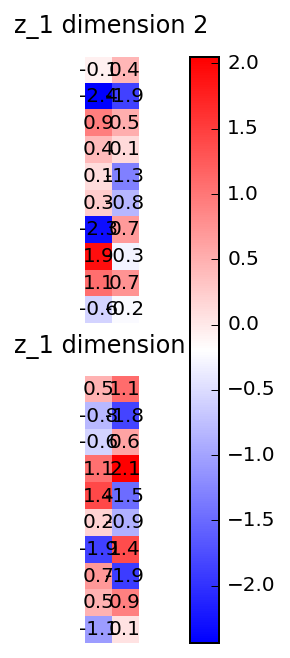

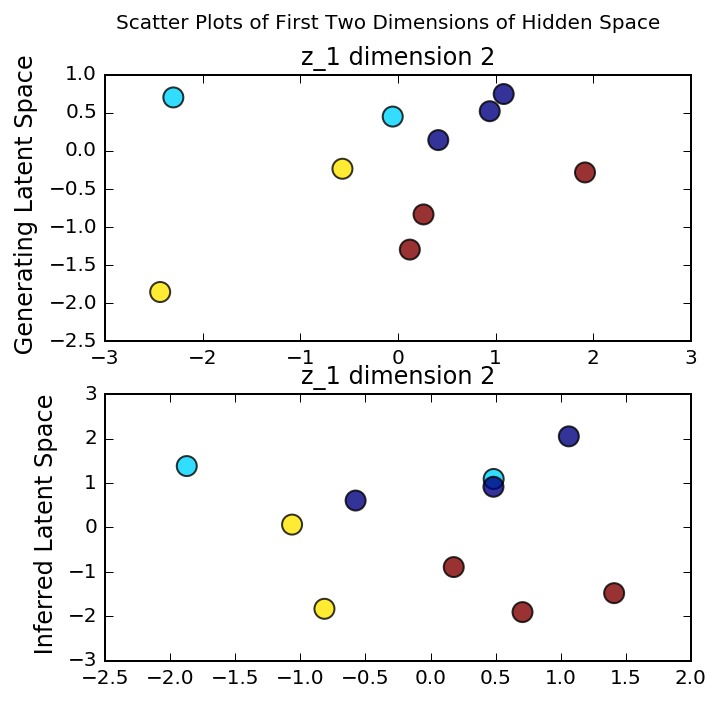

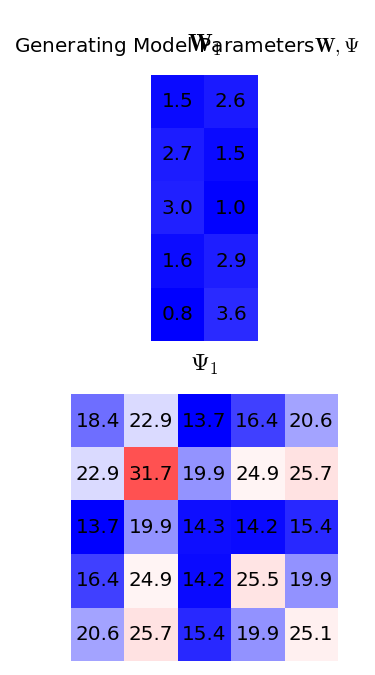

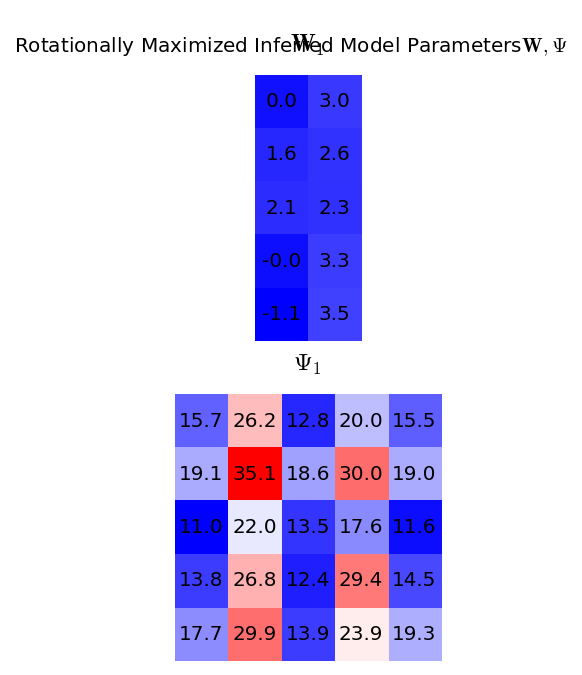

In [12]:
ModelComparer(genModel, fitModel).compareAll()